# Análisis de Diamantes de laboratorio

## Fernando de Jesús Mendivil Terminel - A00232280

## Estadística Descriptiva

### Librerías usadas:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

### Grid para las gráficas (a excepción del mapa de calor):

In [ ]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': [u'times']})

## 1. Carga de datos y estadísticas descriptivas

### Abrir el archivo "Diamonds are forever.csv" y asignarlo a la variable "diamantes"

In [ ]:
diamantes = pd.read_csv("./Diamonds are forever.csv", na_values='')
print('shape: ', diamantes.shape)
diamantes.head(10)


shape:  (308, 5)


,Carat,Colour,Clarity,Lab,Price ($US)
0,0.30,1,5,1,911.4
1,0.30,2,4,1,1057.0
2,0.30,4,2,1,1057.0
3,0.30,4,4,1,882.0
4,0.31,1,4,1,1148.7
5,0.31,2,4,1,1088.5
6,0.31,3,4,1,998.9
7,0.31,4,3,1,998.9
8,0.31,5,5,1,788.2
9,0.31,6,4,1,788.2


In [ ]:
diamantes.tail(10)

,Carat,Colour,Clarity,Lab,Price ($US)
298,1.01,4,3,3,6995.1
299,1.01,4,5,3,6505.1
300,1.01,5,3,3,6603.1
301,1.01,5,4,3,6407.1
302,1.01,6,2,3,6211.1
303,1.01,6,4,3,5722.5
304,1.02,3,3,3,7557.2
305,1.06,5,3,3,6923.0
306,1.02,5,5,3,6271.3
307,1.09,6,3,3,6374.9


### Verificación de datos nulos (no hay):

In [ ]:
diamantes.isnull().sum()

Carat          0
Colour         0
Clarity        0
Lab            0
Price ($US)    0
dtype: int64

### Estadísticas descriptivas: Conteo, media, desviación estándar, cuártiles (mínimo, 25%, 50%, 75%, máximo) y mediana:

In [ ]:
diamantes.describe()

,Carat,Colour,Clarity,Lab,Price ($US)
count,308.000000,308.00000,308.000000,308.000000,308.000000
mean,0.630909,3.75000,3.152597,1.766234,3513.638636
std,0.277183,1.40236,1.293718,0.833283,2382.181001
min,0.180000,1.00000,1.000000,1.000000,446.600000
25%,0.350000,3.00000,2.000000,1.000000,1137.500000
50%,0.620000,4.00000,3.000000,2.000000,2950.500000
75%,0.850000,5.00000,4.000000,3.000000,5212.200000
max,1.100000,6.00000,5.000000,3.000000,11205.600000


In [ ]:
print ("Mediana en Carat", diamantes['Carat'].median())
print ("Mediana en Colour", diamantes['Colour'].median())
print ("Mediana en Clarity", diamantes['Clarity'].median())
print ("Mediana en Lab", diamantes['Lab'].median())
print ("Mediana en Price ($US)", diamantes['Price ($US)'].median())

Mediana en Carat 0.62
Mediana en Colour 4.0
Mediana en Clarity 3.0
Mediana en Lab 2.0
Mediana en Price ($US) 2950.5


### Las variables del estudio de diamantes son las siguientes:
|Variable|Tipo|Descripción|
|--------|----|-----------|
|Carat|Cuantitativa|Peso del diamante en carats.|
|Colour|Cualitativa|Valor numérico de la calidad del color; va de 1 (sin color) a 6 (casi sin color)|
|Clarity|Cualitativa|Valor numérico de la claridad; va de 1 (perfecto) a 5 (inclusiones muy pequeña)|
|Lab|Cualitativa|Laboratorio que evaluó el diamante, en orden de 1 a 3: Gemmological Institute of America, International Gemmological Institute, Diamond High Council|
|Price ($US)|Cuantitativa|Valor del diamante|


## 2. Obteniendo gráficas y mapas de calor

### 2.1 Histogramas: Se utilizaron para las variables cualitativas (color, claridad y laboratorio). Con esto se realiza un conteo de cuántos diamantes tienen tal especificación de cada característica.

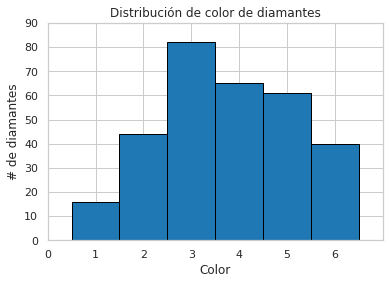

In [ ]:
colores = diamantes['Colour']
histogram = Counter(min(color // 1 * 1, 6) for color in colores)

plt.bar([x for x in histogram.keys()],
        histogram.values(),
        1,
        edgecolor=(0, 0, 0))

plt.axis([0, 7, 0, 90])

plt.xticks([i for i in range(7)])
plt.xlabel("Color")
plt.ylabel("# de diamantes")
plt.title("Distribución de color de diamantes")
plt.show()

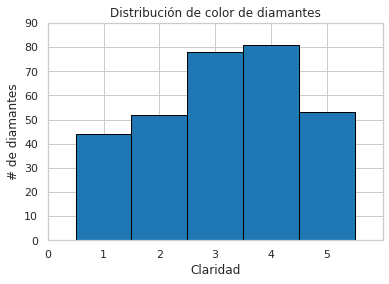

In [ ]:
claridades = diamantes['Clarity']
histogram = Counter(min(claridad // 1 * 1, 5) for claridad in claridades)

plt.bar([x for x in histogram.keys()],
        histogram.values(),
        1,
        edgecolor=(0, 0, 0))

plt.axis([0, 6, 0, 90])

plt.xticks([i for i in range(6)])
plt.xlabel("Claridad")
plt.ylabel("# de diamantes")
plt.title("Distribución de color de diamantes")
plt.show()

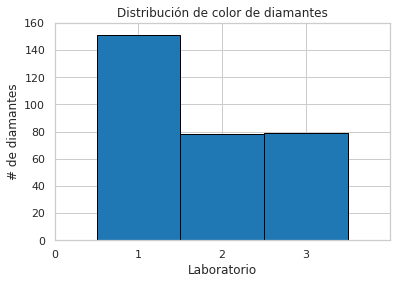

In [ ]:
labs = diamantes['Lab']
histogram = Counter(min(lab // 1 * 1, 5) for lab in labs)

plt.bar([x for x in histogram.keys()],
        histogram.values(),
        1,
        edgecolor=(0, 0, 0))

plt.axis([0, 4, 0, 160])

plt.xticks([i for i in range(4)])
plt.xlabel("Laboratorio")
plt.ylabel("# de diamantes")
plt.title("Distribución de color de diamantes")
plt.show()

### 2.2 Mapa de calor: Expresa gráficamente la correlación entre variables, para ver qué tanto influye una variable a otra. Entre mayor sea el valor (absolutamente hablando), significa que la relación entre variables es mejor.

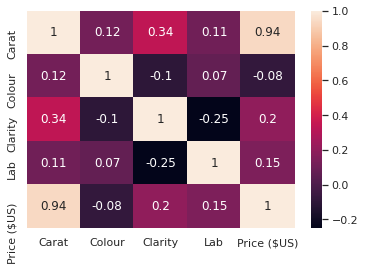

In [ ]:
correlation_matrix = diamantes.corr().round(2)

sns.heatmap(data = correlation_matrix, annot=True)

### 2.3 Boxplots: Indica gráficamente el cómo están los cuartiles. Los boxplots del precio y kilates están en diferentes figuras debido  a que sus rangos son muy diferentes; por otro lado, los de las 3 características restantes tienen rangos parecidos.

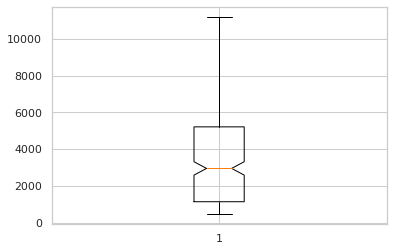

In [ ]:
plt.boxplot(diamantes['Price ($US)'], notch=True)
plt.show()

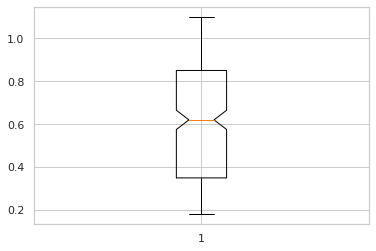

In [ ]:
plt.boxplot(diamantes['Carat'], notch=True)
plt.show()

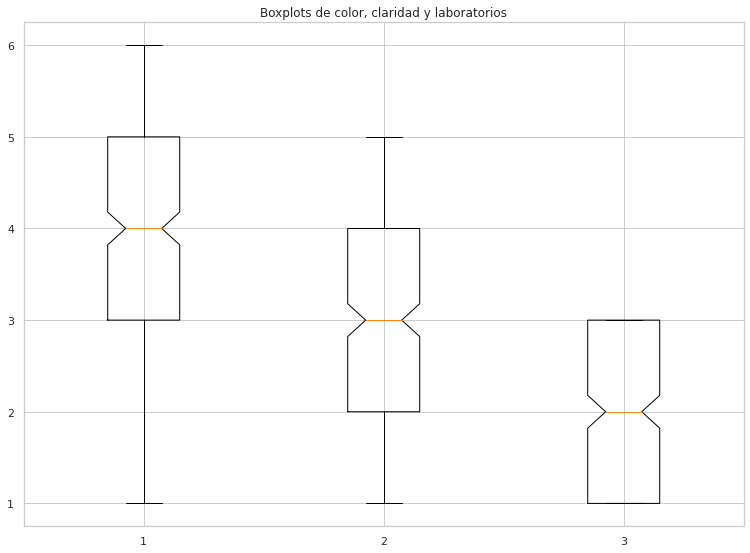

In [ ]:
datos = [diamantes['Colour'],diamantes['Clarity'],diamantes['Lab']]

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])

box = ax.boxplot(datos, notch=True)
plt.title("Boxplots de color, claridad y laboratorios")
plt.show()

### 2.4 Gráfico de dispersión: Se graficó la relación kilate-precio, pues en el mapa de calor estas dos variables tenían la mayor correlación.

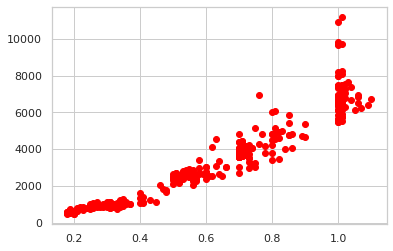

In [ ]:
x = diamantes.Carat
y = diamantes['Price ($US)']
plt.scatter(x, y, color = 'red')

## Usando K-means

### 3.1 Importación de las librerías de inteligencia artificial

In [ ]:
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

### 3.2 Normalización de datos: Para que el algoritmo funcione correctamente, lo mejor es utilizar datos entre 0 y 1. Y para los laboratorios, se modificó la columna de tal manera que salieran 3, una por cada laboratorio, y sus valores son 0 o 1, dependiendo si el diamante fue estudiado en ese laboratorio o no.

In [ ]:
one = OneHotEncoder(handle_unknown ='ignore')
min_max = MinMaxScaler()

result = one.fit_transform(diamantes['Lab'].values.reshape(-1, 1)).toarray()

dia_1 = diamantes
dia_1[['Lab1', 'Lab2', 'Lab3']] = pd.DataFrame(result, index = dia_1.index)
dia_2 = min_max.fit_transform(dia_1.values)
dia_2 = pd.DataFrame(dia_2, columns=dia_1.columns)
dia_2

,Carat,Colour,Clarity,Lab,Price ($US),Lab1,Lab2,Lab3
0,0.130435,0.0,1.00,0.0,0.043201,1.0,0.0,0.0
1,0.130435,0.2,0.75,0.0,0.056734,1.0,0.0,0.0
2,0.130435,0.6,0.25,0.0,0.056734,1.0,0.0,0.0
3,0.130435,0.6,0.75,0.0,0.040468,1.0,0.0,0.0
4,0.141304,0.0,0.75,0.0,0.065257,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
303,0.902174,1.0,0.75,1.0,0.490371,0.0,0.0,1.0
304,0.913043,0.4,0.50,1.0,0.660898,0.0,0.0,1.0
305,0.956522,0.8,0.50,1.0,0.601952,0.0,0.0,1.0
306,0.913043,0.8,1.00,1.0,0.541379,0.0,0.0,1.0


### 3.3 *Clusters*: Aquí se utilizan los algoritmos de inteligencia artificial para obtener los centros de donde nosotros vimos que se concentraban los datos (como nosotros visualizamos 3 grandes grupos en el gráfico de dispersión, entonces nuestro número de clusters es 3).

In [ ]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(dia_2)
clu.cluster_centers_

array([[ 5.35056147e-01,  5.35099338e-01,  6.75496689e-01,
        -5.55111512e-16,  3.03995915e-01,  1.00000000e+00,
        -2.22044605e-16,  6.66133815e-16],
       [ 6.87947166e-01,  5.87341772e-01,  5.37974684e-01,
         1.00000000e+00,  4.25694473e-01,  0.00000000e+00,
         2.77555756e-16,  1.00000000e+00],
       [ 2.02759197e-01,  5.41025641e-01,  2.72435897e-01,
         5.00000000e-01,  1.05993194e-01, -5.55111512e-17,
         1.00000000e+00,  4.44089210e-16]])

### 4.1 Estas son las clasificaciones de cada elemento que detectó el algoritmo, esto es dependiendo de cada grupo.

In [ ]:
clu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### 4.2 Evaluaciones de la inteligencia artificial (en este caso):

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(dia_2, clu.labels_)

0.6258920976995611

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(dia_2, clu.labels_)

536.1030009114689